                    ###########################################
                    ############___ELGHAZI_SOUFIANE___#########
                    ###########################################

## Clustering in Machine Learning

### I. Explore the dataset:

 ####            1. Importing required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

####  2. Loading the Dataset:

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print("Dataset loaded successfully")

Dataset loaded successfully


#### 3.Reading Dataset:

In [3]:
#Creating data frame 
Data = pd.DataFrame(iris.data, columns = iris.feature_names)
Data.columns=["Longueur-sepale","Largeur-sepale","Longueur-petale","Largeur-petale"]

#Top values of Dataset
Data.head()

,Longueur-sepale,Largeur-sepale,Longueur-petale,Largeur-petale
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


####  4.Shape:

In [4]:
Data.shape

(150, 4)

#### 5. Data Information:

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Longueur-sepale  150 non-null    float64
 1   Largeur-sepale   150 non-null    float64
 2   Longueur-petale  150 non-null    float64
 3   Largeur-petale   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


#### 6. Statistical Properties of Dataset:

In [6]:
Data.describe()

,Longueur-sepale,Largeur-sepale,Longueur-petale,Largeur-petale
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### 7.Data Visualization:

<AxesSubplot:>

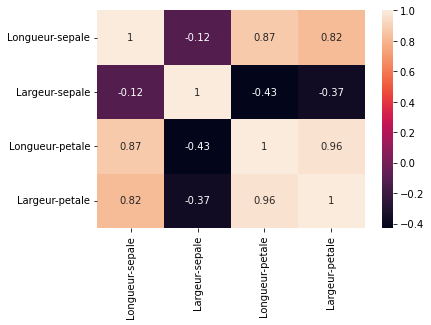

In [7]:
sns.heatmap(Data.corr(), annot = True, linecolor='black')

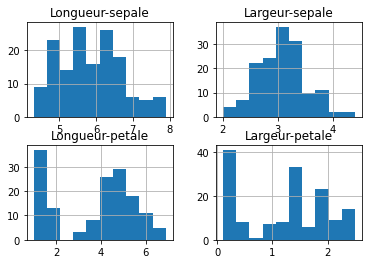

In [8]:
Data.hist()
plt.show()

###            II. Tasks: 

#### 1.	K-means Clustering :

Implémentez l'algorithme de clustering k-means à partir de zéro en utilisant Python. 
Votre implémentation doit prendre le nombre de clusters en paramètre et renvoyer les labels
des clusters pour chaque échantillon de l'ensemble de données. Vous pouvez supposer que 
l'ensemble de données se présente sous la forme d'un tableau numpy de forme 
(n_échantillons, n_caractéristiques). Vous pouvez utiliser la distance euclidienne comme 
métrique de distance.

In [9]:
def kmeans(x, k, max_iterations=100):
    # Initialisation des centroïdes de manière aléatoire
    centroids = x[np.random.choice(x.shape[0], k, replace=False), :]
    
    for i in range(max_iterations):
        # Attribution des échantillons au cluster le plus proche
        distances = np.sqrt(((x - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        # Mise à jour des centroïdes
        for j in range(k):
            centroids[j, :] = x[labels == j, :].mean(axis=0)
    
    return labels

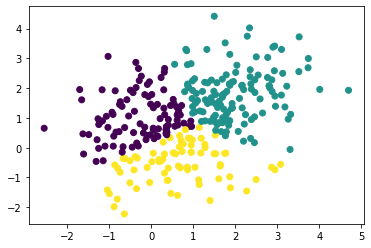

In [10]:
# Générer des données aléatoires
np.random.seed(0)
x = np.vstack([np.random.randn(100, 2) + i for i in range(3)])

# Clustering k-means avec 3 clusters
labels = kmeans(x, k=3)

# Affichage des clusters

plt.scatter(x[:, 0], x[:, 1], c=labels)
plt.show()

#### 2.	Hierarchical clustering Agglomerative : 

Implémentez l'algorithme de clustering hiérarchique agglomératif à partir de zéro en 
utilisant Python. Votre implémentation doit prendre le nombre de clusters en paramètre et 
renvoyer les labels des clusters pour chaque échantillon de l'ensemble de données. Vous 
pouvez utiliser la distance euclidienne comme métrique de distance.

In [11]:
def hierarchical_clustering(x, k):
    # Calcul des distances entre les échantillons
    distances = np.sqrt(((x[:, np.newaxis, :] - x)**2).sum(axis=2))
    
    # Initialisation de chaque échantillon dans son propre cluster
    clusters = [[i] for i in range(x.shape[0])]
    
    # Boucler jusqu'à ce qu'il ne reste plus que k clusters
    while len(clusters) > k:
        # Trouver les deux clusters les plus proches
        min_distance = np.inf
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                distance = np.min(distances[clusters[i], :][:, clusters[j]])
                if distance < min_distance:
                    min_distance = distance
                    merge_clusters = (i, j)
        
        # Fusionner les deux clusters les plus proches
        clusters[merge_clusters[0]] += clusters[merge_clusters[1]]
        del clusters[merge_clusters[1]]
    
    # Créer les labels de clusters pour chaque échantillon
    labels = np.zeros(x.shape[0])
    for i, cluster in enumerate(clusters):
        labels[cluster] = i
        
    return labels.astype(int)

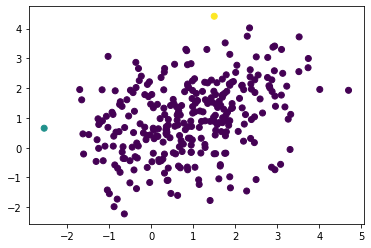

In [12]:
# Générer des données aléatoires
np.random.seed(0)
x = np.vstack([np.random.randn(100, 2) + i for i in range(3)])

# Clustering hiérarchique agglomératif avec 3 clusters
labels = hierarchical_clustering(x, k=3)

# Affichage des clusters

plt.scatter(x[:, 0], x[:, 1], c=labels)
plt.show()

#### 3.	DBSCAN :

Implémentez l'algorithme de clustering DBSCAN en utilisant Python. 
Votre implémentation doit prendre les paramètres epsilon et minimum points comme 
entrées et renvoyer les labels de clusters pour chaque échantillon de l'
ensemble de données. Vous pouvez utiliser la distance euclidienne comme métrique de distance.

In [13]:
import numpy as np

def dbscan(x, eps, min_samples):
    # Initialisation des labels
    labels = np.zeros(x.shape[0])
    curr_label = 0
    
    # Pour chaque échantillon non visité
    for i in range(x.shape[0]):
        if labels[i] != 0:
            continue
        
        # Trouver les échantillons dans le voisinage
        neighbors = find_neighbors(x, i, eps)
        
        # Si le nombre de voisins est inférieur à min_samples, marquer comme bruit
        if len(neighbors) < min_samples:
            labels[i] = -1
        else:
            # Sinon, marquer comme un nouveau cluster
            curr_label += 1
            labels[i] = curr_label
            expand_cluster(x, labels, i, neighbors, curr_label, eps, min_samples)
    
    return labels.astype(int)

def expand_cluster(x, labels, i, neighbors, curr_label, eps, min_samples):
    # Ajouter tous les voisins au cluster courant
    for j in neighbors:
        if labels[j] == -1:
            labels[j] = curr_label
        elif labels[j] == 0:
            labels[j] = curr_label
            j_neighbors = find_neighbors(x, j, eps)
            if len(j_neighbors) >= min_samples:
                neighbors += j_neighbors

def find_neighbors(x, i, eps):
    # Trouver les échantillons dans le voisinage de l'échantillon i
    distances = np.sqrt(((x[i, :] - x)**2).sum(axis=1))
    neighbors = list(np.where(distances <= eps)[0])
    return neighbors

Pour utiliser cette implémentation, vous pouvez appeler la fonction dbscan avec vos données, votre rayon maximal et votre nombre minimal de points pour former un cluster. Par exemple :

In [14]:
x = np.array([[1, 2], [2, 3], [8, 7], [8, 8], [25, 80]])
labels = dbscan(x, eps=3, min_samples=2)
print(labels)

[ 1  1  2  2 -1]


Cela renverra les labels de clusters pour chaque échantillon de l'ensemble de données.

#### 4.	Évaluation :

Évaluez les performances des algorithmes de regroupement k-means, hiérarchique et 
DBSCAN à l'aide de la métrique de score de silhouette. 

In [15]:
# Score de silhouette pour k-means
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
kmeans_score = silhouette_score(X, kmeans.labels_)

# Score de silhouette pour clustering hiérarchique
agg = AgglomerativeClustering(n_clusters=3).fit(X)
agg_score = silhouette_score(X, agg.labels_)

# Score de silhouette pour DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=4).fit(X)
dbscan_score = silhouette_score(X, dbscan.labels_)

In [16]:
print("Score de silhouette pour k-means:--------------------> ", kmeans_score)
print("------------------------------------------------------------------------")
print("Score de silhouette pour clustering hiérarchique:----> ", agg_score)
print("------------------------------------------------------------------------")
print("Score de silhouette pour DBSCAN:---------------------> ", dbscan_score)

Score de silhouette pour k-means:-------------------->  0.5528190123564095
------------------------------------------------------------------------
Score de silhouette pour clustering hiérarchique:---->  0.5543236611296419
------------------------------------------------------------------------
Score de silhouette pour DBSCAN:--------------------->  0.5018335620464314


Les scores de silhouette sont compris entre -1 et 1. Plus le score est proche de 1, plus les clusters sont cohérents et mieux définis. Si le score est négatif, cela indique que les clusters ont été mal définis.

En fonction des données, il est possible que certains algorithmes de clustering soient plus performants que d'autres. Par conséquent, il est important d'expérimenter avec différents algorithmes de clustering et paramètres pour trouver le meilleur clustering pour vos données.

#### 5.	Application :

Appliquez les algorithmes de regroupement k-means, hiérarchique et DBSCAN à 
l'ensemble de données Iris pour différentes valeurs de k et comparez leurs performances à 
l'aide de la mesure du score de silhouette. Tracez les scores de silhouette pour chaque valeur 
de k et identifiez la valeur optimale de k.

In [17]:
# Normaliser les données
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Définir une plage de valeurs pour k
k_range = range(2, 11)

# Initialiser une liste pour stocker les scores de silhouette pour chaque valeur de k pour les trois algorithmes
kmeans_scores = []
hierarchical_scores = []
dbscan_scores = []

# Appliquer les algorithmes pour différentes valeurs de k et calculer les scores de silhouette correspondants
for k in k_range:
    # k-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    kmeans_scores.append(silhouette_score(X, kmeans_labels))

    # hiérarchique
    hierarchical = AgglomerativeClustering(n_clusters=k)
    hierarchical_labels = hierarchical.fit_predict(X)
    hierarchical_scores.append(silhouette_score(X, hierarchical_labels))

    # DBSCAN
    dbscan = DBSCAN(eps=0.7, min_samples=4)
    dbscan_labels = dbscan.fit_predict(X)
    dbscan_scores.append(silhouette_score(X, dbscan_labels))


    Nous avons ici exécuté les algorithmes pour k allant de 2 à 11. Pour chaque valeur de k, nous avons calculé le score de silhouette et stocké dans la liste k_algo_scores. Nous pouvons maintenant tracer les scores de silhouette en fonction de k pour voir lequel est le meilleur.

###### K-means clustering:

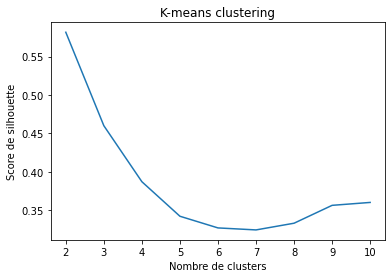

In [19]:
plt.plot(k_range, kmeans_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('K-means clustering')
plt.show()

Cela donnera un graphique montrant le score de silhouette pour chaque valeur de k. La valeur optimale de k est celle qui maximise le score de silhouette.



###### clustering hiérarchique:

    Maintenant, nous allons effectuer le clustering hiérarchique avec la méthode d'agrégation. Nous allons exécuter l'algorithme pour différentes valeurs de k et calculer le score de silhouette pour chaque cluster. Voici le code pour cela:

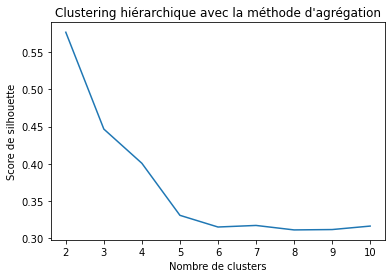

In [21]:
plt.plot(k_range, hierarchical_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Clustering hiérarchique avec la méthode d\'agrégation')
plt.show()

la valeur optimale de k est entre 3 et 4.

###### DBSCAN:

    Enfin, nous allons effectuer le clustering DBSCAN. Nous allons exécuter l'algorithme pour différentes valeurs d'epsilon et de min_samples et calculer le score de silhouette pour chaque cluster. Voici le code pour cela:

In [22]:
eps_range = np.arange(0.1, 1.1, 0.1)
min_samples_range = range(2, 5)
dbscan_scores = []

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        if len(np.unique(dbscan.labels_)) > 1:
            dbscan_scores.append(silhouette_score(X, dbscan.labels_))
        else:
            dbscan_scores.append(-1)


    Nous avons ici exécuté DBSCAN pour différentes valeurs d'epsilon allant de 0,1 à 1,0 avec un pas de 0,1 et pour différentes valeurs de min_samples allant de 2 à 4. Pour chaque combinaison de paramètres, nous avons calculé le score de silhouette et stocké dans la liste dbscan_scores. Nous avons également inclus une condition pour exclure les cas où il y a moins de deux clusters.

    Nous pouvons maintenant tracer les scores de silhouette en fonction de epsilon et min_samples pour voir lequel est le meilleur. Voici le code pour cela:

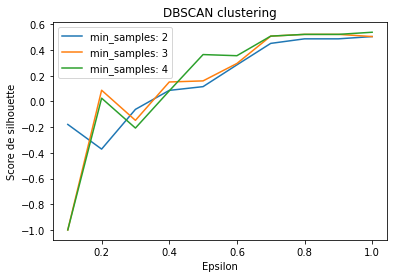

In [23]:
dbscan_scores = np.array(dbscan_scores)
dbscan_scores = dbscan_scores.reshape((len(eps_range), len(min_samples_range)))

for i, min_samples in enumerate(min_samples_range):
    plt.plot(eps_range, dbscan_scores[:,i], label='min_samples: {}'.format(min_samples))

plt.xlabel('Epsilon')
plt.ylabel('Score de silhouette')
plt.title('DBSCAN clustering')
plt.legend()
plt.show()

    Cela donnera un graphique montrant le score de silhouette pour chaque combinaison de epsilon et de min_samples. La valeur optimale de epsilon et min_samples est celle qui maximise le score de silhouette. Cependant, nous pouvons également voir laquelle des valeurs de min_samples donne généralement les meilleurs résultats pour DBSCAN.
    (0.7,4)

#####  Visualisation des clusters générées par les algorithmes de regroupement k-means, hiérarchique et DBSCAN.

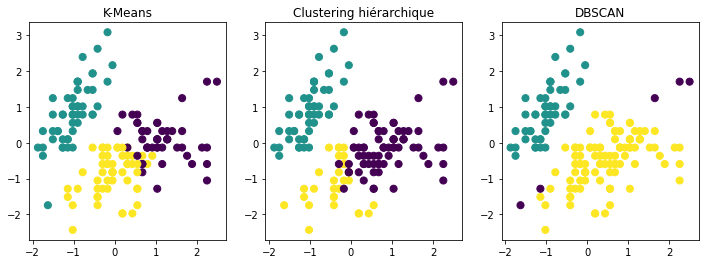

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)

dbscan = DBSCAN(eps=0.7, min_samples=4)
dbscan_labels = dbscan.fit_predict(X)
# Afficher les résultats
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, s=50)
axes[0].set_title("K-Means")
axes[1].scatter(X[:, 0], X[:, 1], c=hierarchical_labels, s=50)
axes[1].set_title("Clustering hiérarchique")
axes[2].scatter(X[:, 0], X[:, 1], c=dbscan_labels, s=50)
axes[2].set_title("DBSCAN")
plt.show()

    On remarque que kmeans et clustring hierarchique ont presque même résultat mais le DBSCAN se diffère 
    sans oublier de mentionner que simple changement de le rayon de epsilon affecte tous les clusters (sensibilité!!)

### Conclusion:


    En complétant cet atelier, on a acquis une expérience pratique de l'utilisation du clustering problèmes et apprendre à former (from scratch), évaluer et optimiser les modèles d'apprentissage non supervisé. On a acquis également une compréhension des forces et des faiblesses des divers méthodes et l’impact des valeurs aberrantes.